In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from wordcloud import WordCloud, STOPWORDS# Generate word cloud

import warnings
warnings.filterwarnings("ignore")

In [ ]:
netflix_shows = pd.read_csv('netflix_shows.csv')
netflix_shows.head()

In [ ]:
netflix_shows["rating"].value_counts()

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(netflix_shows["rating"], palette='Reds')
plt.show()

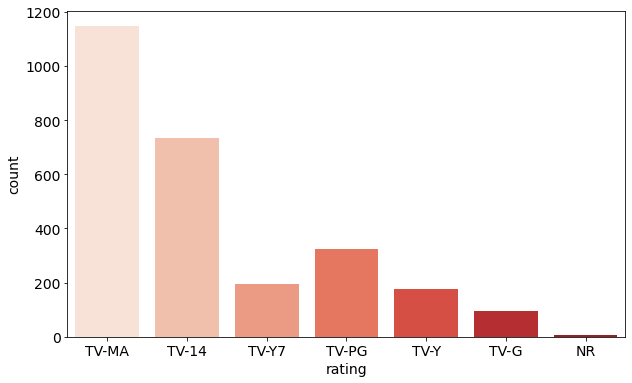

In [ ]:
# Clean up ratings by replacing them with plausible counterparts
netflix_shows.rating = netflix_shows.rating.replace({"TV-Y7-FV" : "TV-Y7", "R" : "TV-MA"})

fig = plt.figure(figsize=(10,6))
sns.countplot(netflix_shows["rating"], palette='Reds')
plt.show()

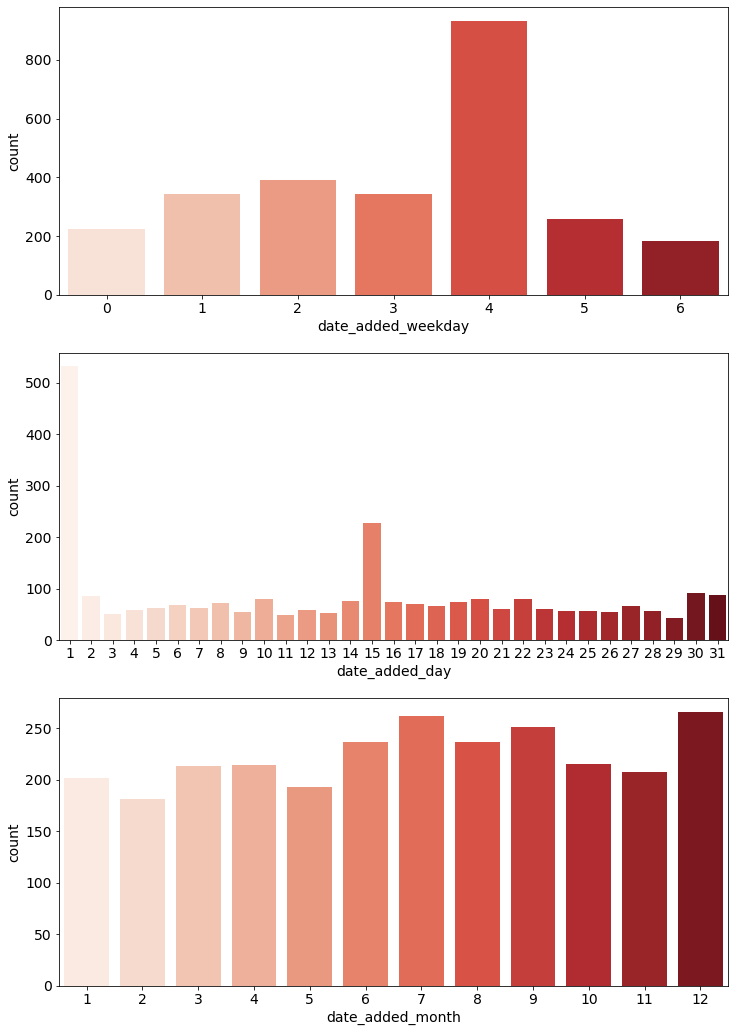

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12,18))
sns.countplot(netflix_shows["date_added_weekday"], palette='Reds', ax=ax[0])
sns.countplot(netflix_shows["date_added_day"], palette='Reds', ax=ax[1])
sns.countplot(netflix_shows["date_added_month"], palette='Reds', ax=ax[2])

plt.show()

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('director')]].sum(axis=0).sort_values(ascending=False))

netflix_shows.drop("director_Unknown", axis=1, inplace=True)

director_Unknown               2446
director_KenBurns                 3
director_AlastairFothergill       3
director_StanLathan               2
director_JoeBerlinger             2
                               ... 
director_HoudaBenyamina           1
director_HongWon-ki               1
director_HiroyukiSeshita          1
director_HikaruToda               1
director_ZiadDoueiri              1
Length: 300, dtype: int64

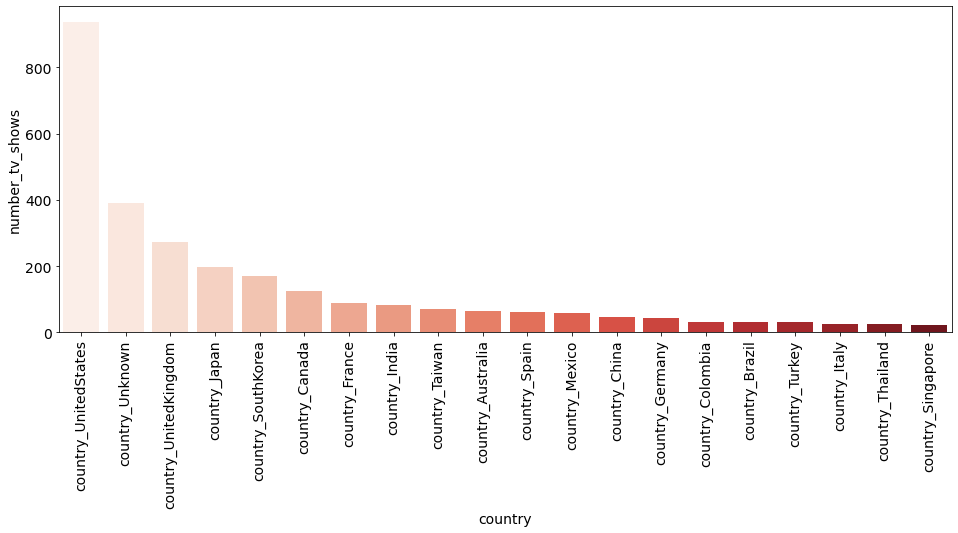

In [ ]:
temp = netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('country')]].sum(axis=0).sort_values(ascending=False).to_frame().reset_index()
temp.columns = ['country', 'number_tv_shows']

fig, ax = plt.subplots(1, 1, figsize=(16,6))

sns.barplot(data=temp[temp.number_tv_shows > 20], x='country', y='number_tv_shows', palette='Reds')

for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(90) 
plt.show()

most_common_countries = temp[temp.number_tv_shows > 20].country.values
most_common_countries = [c for c in most_common_countries if c != 'country_Unknown']

netflix_shows.drop("country_Unknown", axis=1, inplace=True)

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('cast')]].sum(axis=0).sort_values(ascending=False))

cast_Unknown               350
cast_TakahiroSakurai        25
cast_YukiKaji               19
cast_JunichiSuwabe          17
cast_DaisukeOno             17
                          ... 
cast_IvyYin                  1
cast_IvánPellicer            1
cast_IvánÁlvarezdeAraya      1
cast_IzaMoreira              1
cast_ŞükrüÖzyıldız           1
Length: 14864, dtype: int64

listed_in_InternationalTVShows        1351
listed_in_TVDramas                     763
listed_in_TVComedies                   581
listed_in_CrimeTVShows                 470
listed_in_Kids'TV                      451
listed_in_Docuseries                   395
listed_in_RomanticTVShows              370
listed_in_RealityTV                    255
listed_in_BritishTVShows               253
listed_in_AnimeSeries                  176
listed_in_Spanish-LanguageTVShows      174
listed_in_TVAction&Adventure           168
listed_in_KoreanTVShows                151
listed_in_TVMysteries                   98
listed_in_Science&NatureTV              92
listed_in_TVSci-Fi&Fantasy              84
listed_in_TVHorror                      75
listed_in_TeenTVShows                   69
listed_in_TVThrillers                   57
listed_in_Stand-UpComedy&TalkShows      56
listed_in_Classic&CultTV                28
listed_in_TVShows                       16
dtype: int64

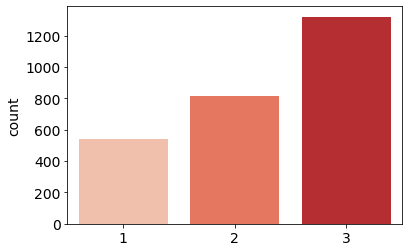

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('listed_in')]].sum(axis=0).sort_values(ascending=False))

temp = netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('listed_in')]].sum(axis=1)
sns.countplot(temp, palette='Reds');

listed_in_TVDramas                    763
listed_in_TVComedies                  581
listed_in_CrimeTVShows                470
listed_in_Kids'TV                     451
listed_in_Docuseries                  395
listed_in_RomanticTVShows             370
listed_in_RealityTV                   255
listed_in_AnimeSeries                 176
listed_in_TVAction&Adventure          168
listed_in_TVMysteries                  98
listed_in_Science&NatureTV             92
listed_in_TVSci-Fi&Fantasy             84
listed_in_TVHorror                     75
listed_in_TVThrillers                  57
listed_in_Stand-UpComedy&TalkShows     56
listed_in_Classic&CultTV               28
dtype: int64

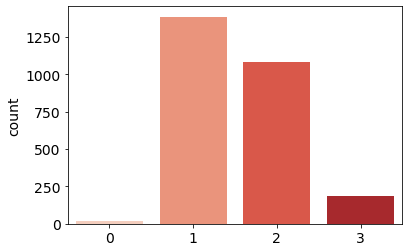

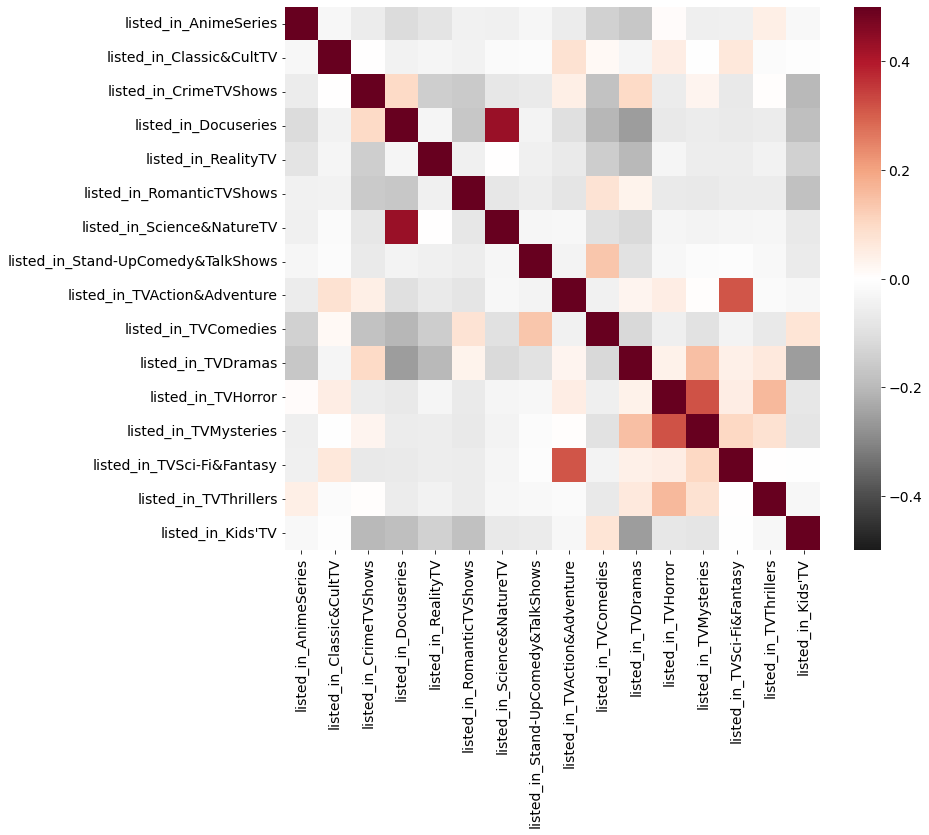

In [ ]:
netflix_shows.drop("listed_in_TVShows", axis=1, inplace=True)

category_cols = ['listed_in_AnimeSeries', 
                 'listed_in_Classic&CultTV', 
                 'listed_in_CrimeTVShows',
                 'listed_in_Docuseries', 
                 'listed_in_RealityTV',
                 'listed_in_RomanticTVShows', 
                 'listed_in_Science&NatureTV',
                 'listed_in_Stand-UpComedy&TalkShows', 
                 'listed_in_TVAction&Adventure',
                 'listed_in_TVComedies', 
                 'listed_in_TVDramas', 
                 'listed_in_TVHorror',
                 'listed_in_TVMysteries', 
                 'listed_in_TVSci-Fi&Fantasy',
                 'listed_in_TVThrillers',
                 "listed_in_Kids'TV"]

display(netflix_shows[category_cols].sum(axis=0).sort_values(ascending=False))

temp = netflix_shows[category_cols].sum(axis=1)
sns.countplot(temp, palette='Reds');

temp = netflix_shows[category_cols].corr()

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
sns.heatmap(temp, cmap=plt.cm.get_cmap('RdGy').reversed(), vmin=-0.5, vmax=0.5)#, annot=True)
plt.show()

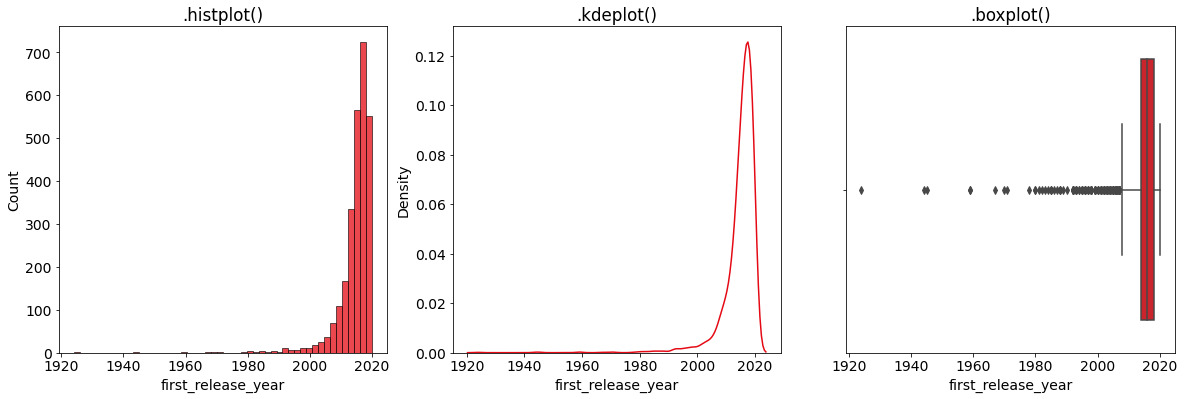

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,6))

sns.histplot(netflix_shows.first_release_year, ax=ax[0], bins=50, color="#E50914")
ax[0].set_title('.histplot()')

sns.kdeplot(netflix_shows.first_release_year, ax=ax[1], color="#E50914")
ax[1].set_title('.kdeplot()')

sns.boxplot(netflix_shows.first_release_year, ax=ax[2], color="#E50914")
ax[2].set_title('.boxplot()')

plt.show()


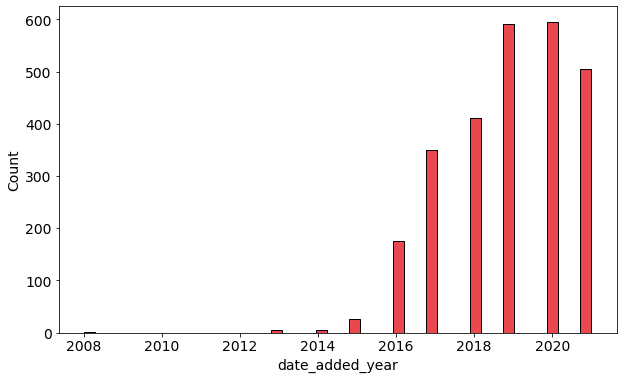

In [ ]:
# Remove missing values maked with 1800
#display(netflix_shows.date_added_year[netflix_shows.date_added_year != 1800].value_counts())
fig = plt.figure(figsize=(10,6))
sns.histplot(netflix_shows.date_added_year[netflix_shows.date_added_year != 1800], color="#E50914")
plt.show()

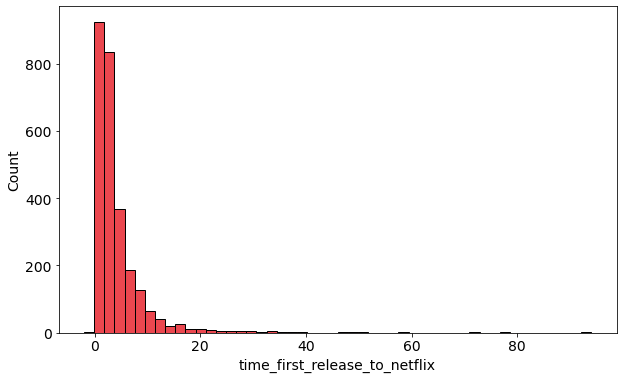

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.histplot(netflix_shows.time_first_release_to_netflix[netflix_shows.date_added_year != 1800], color="#E50914", bins=50)
plt.show()

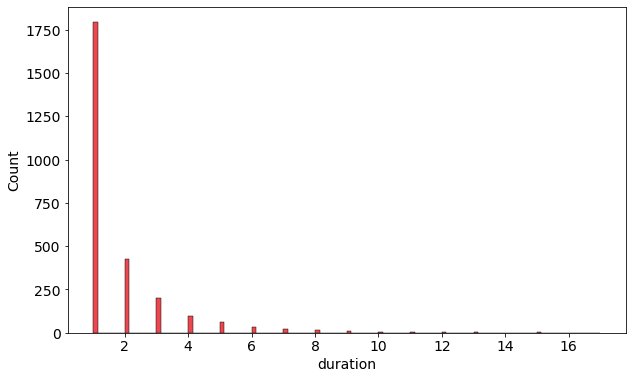

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.histplot(netflix_shows.duration, color="#E50914")
plt.show()

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15))

dtm_descr_life        339
dtm_descr_seri        310
dtm_descr_world       273
dtm_descr_famili      234
dtm_descr_friend      224
dtm_descr_find        194
dtm_descr_love        193
dtm_descr_young       178
dtm_descr_woman       171
dtm_descr_power       137
dtm_descr_school      134
dtm_descr_mysteri     128
dtm_descr_adventur    125
dtm_descr_help        121
dtm_descr_stori       120
dtype: int64

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_title')]].sum(axis=0).sort_values(ascending=False).head(15))

dtm_title_the        594
dtm_title_of         203
dtm_title_and         67
dtm_title_in          67
dtm_title_love        65
dtm_title_with        52
dtm_title_to          51
dtm_title_my          48
dtm_title_on          41
dtm_title_power       29
dtm_title_world       28
dtm_title_for         28
dtm_title_life        26
dtm_title_rangers     26
dtm_title_la          23
dtype: int64

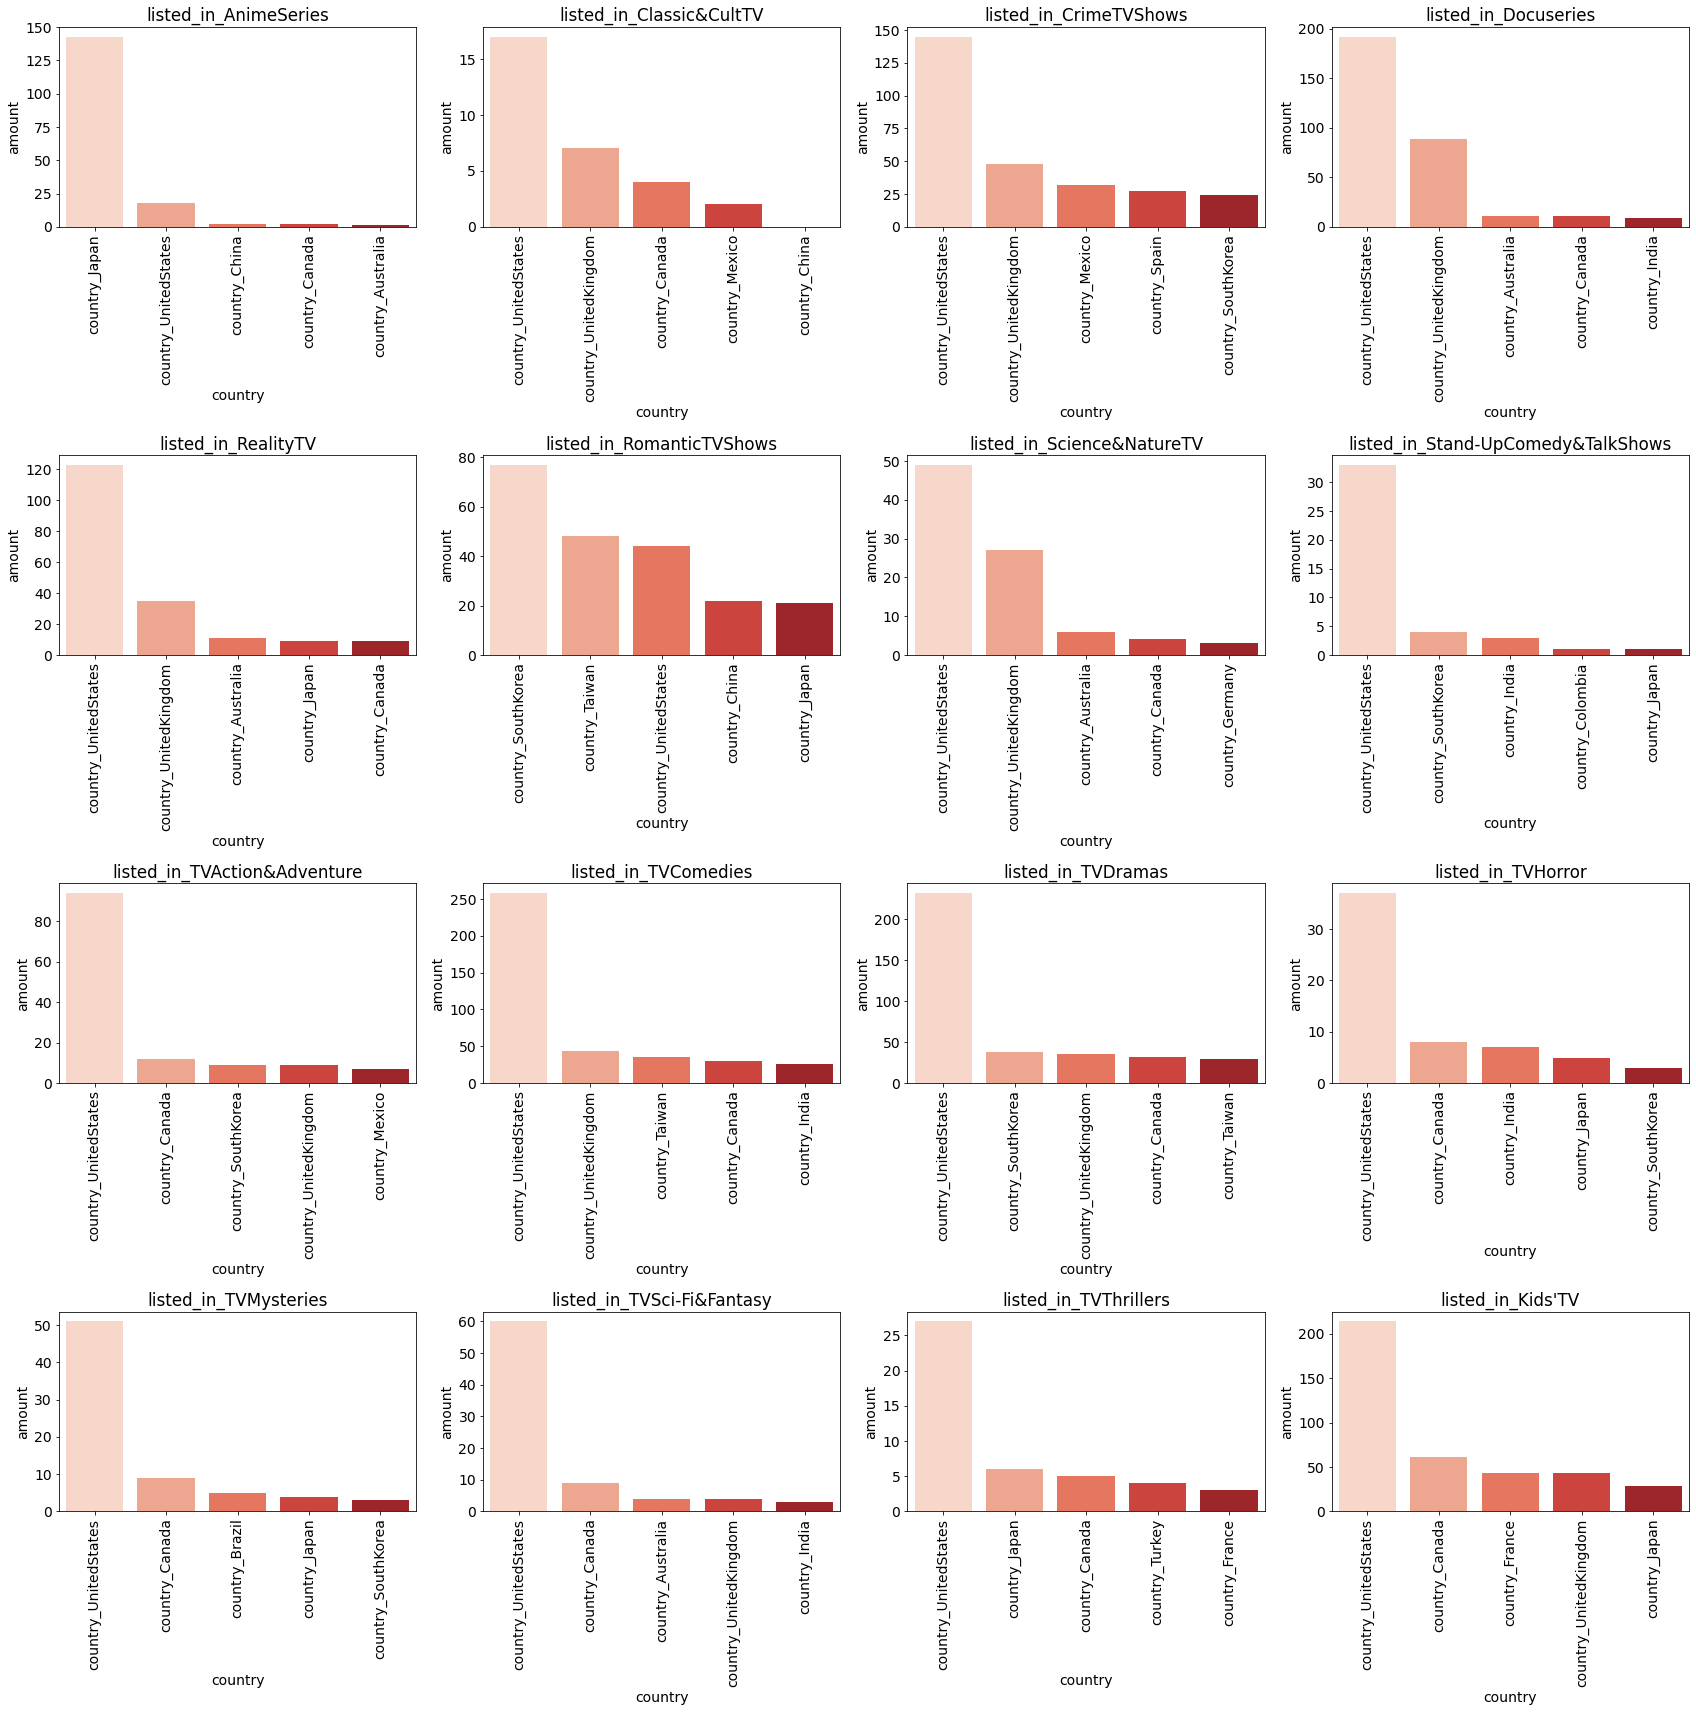

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(24, 24))

j = 0
k = -1
for i, cat in enumerate(category_cols):

    j = (i % 4)
    if j == 0:
        k=k+1
    temp = netflix_shows[netflix_shows[cat] == 1][most_common_countries].sum(axis=0).sort_values(ascending=False).head(5).to_frame().reset_index()
    temp.columns = ['country', 'amount']
    sns.barplot(data=temp, 
                x='country', 
                y='amount', 
               palette='Reds', ax=ax[k,j])
    ax[k,j].set_title(cat)
    for tick in ax[k,j].xaxis.get_major_ticks():
        tick.label.set_rotation(90) 
    


plt.tight_layout()

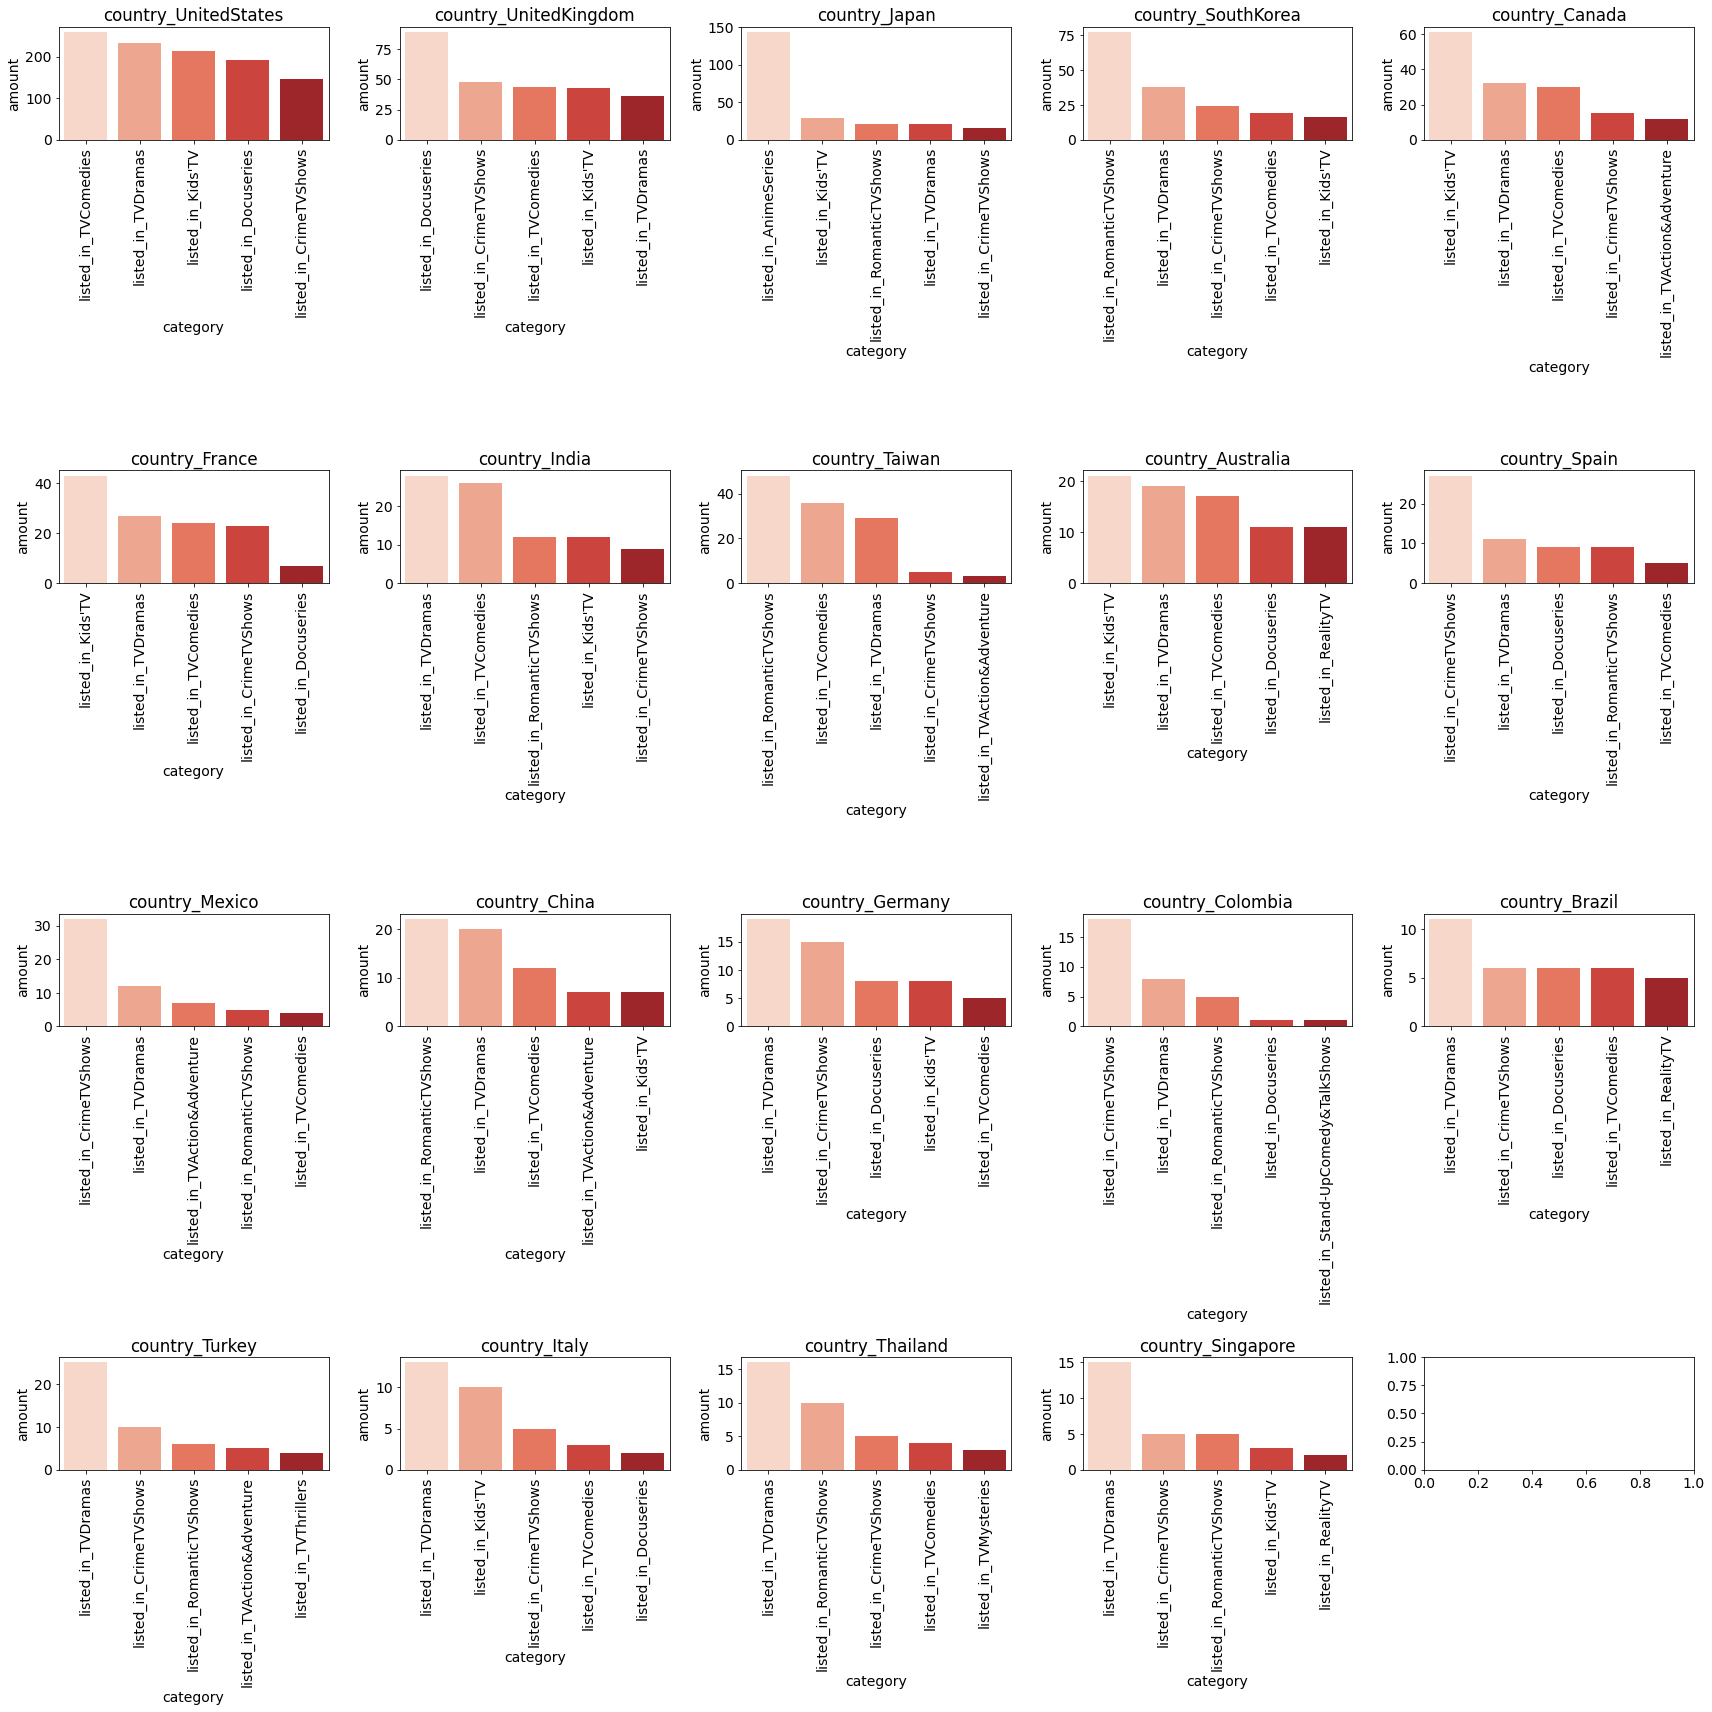

In [ ]:
fig, ax = plt.subplots(4, 5, figsize=(24, 24))

j = 0
k = -1
for i, country in enumerate(most_common_countries):

    j = (i % 5)
    if j == 0:
        k=k+1
    temp = netflix_shows[netflix_shows[country] == 1][category_cols].sum(axis=0).sort_values(ascending=False).head(5).to_frame().reset_index()
    temp.columns = ['category', 'amount']
    sns.barplot(data=temp, 
                x='category', 
                y='amount', 
               palette='Reds', ax=ax[k,j])
    ax[k,j].set_title(country)
    for tick in ax[k,j].xaxis.get_major_ticks():
        tick.label.set_rotation(90) 
    


plt.tight_layout()

In [ ]:
country_cols = netflix_shows.columns[netflix_shows.columns.str.startswith('country')].values

display(netflix_shows[netflix_shows.listed_in_KoreanTVShows == 1][country_cols].sum(axis=0).sort_values(ascending=False).head(10))

display(netflix_shows[netflix_shows.listed_in_BritishTVShows == 1][country_cols].sum(axis=0).sort_values(ascending=False).head(10))

display(netflix_shows[netflix_shows['listed_in_Spanish-LanguageTVShows'] == 1][country_cols].sum(axis=0).sort_values(ascending=False).head(10))

country_SouthKorea      132
country_UnitedStates      3
country_China             1
country_Canada            1
country_Singapore         1
country_Malaysia          1
country_HongKong          1
country_Russia            1
country_Nigeria           0
country_Norway            0
dtype: int64

country_UnitedKingdom    225
country_UnitedStates      24
country_Germany            6
country_Australia          5
country_Ireland            5
country_Spain              5
country_Canada             3
country_India              3
country_China              3
country_Greece             2
dtype: int64

country_Mexico           47
country_Spain            41
country_Colombia         30
country_UnitedStates     29
country_Argentina        18
country_Chile             4
country_UnitedKingdom     1
country_PuertoRico        1
country_Italy             1
country_Cuba              1
dtype: int64

In [ ]:
## Relationsships
temp = netflix_shows.groupby('rating')[netflix_shows.columns[netflix_shows.columns.str.startswith('listed_in')]].sum().T
temp = temp[['NR', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG',  'TV-14','TV-MA', ]]
display(temp.style.background_gradient(cmap='Reds', vmin=0, vmax=100).format("{:.0f}").set_caption('Number Training Pathes per Floor for Buildings in Test Set'))

display(netflix_shows[(netflix_shows.listed_in_TVThrillers == 1) & ((netflix_shows.rating == "TV-Y") | (netflix_shows.rating == "TV-Y7"))])

rating,NR,TV-Y,TV-Y7,TV-G,TV-PG,TV-14,TV-MA
listed_in_AnimeSeries,0,2,26,0,17,71,59
listed_in_BritishTVShows,2,20,5,17,55,46,108
listed_in_Classic&CultTV,0,1,1,1,6,10,9
listed_in_CrimeTVShows,1,0,3,1,4,111,350
listed_in_Docuseries,1,0,0,24,99,92,179
listed_in_InternationalTVShows,2,0,3,24,134,472,715
listed_in_Kids'TV,0,176,190,43,41,0,0
listed_in_KoreanTVShows,0,9,14,2,14,64,48
listed_in_RealityTV,0,0,1,22,71,78,83
listed_in_RomanticTVShows,2,0,0,2,44,190,132


,title,date_added,release_year,rating,duration,description,date_added_month,date_added_day,date_added_year,listed_in_AnimeSeries,...,dtm_title_دفعة,dtm_title_ายนายเจ,dtm_title_าเล,dtm_title_แผนร,dtm_title_忍者ハットリくん,dtm_title_海的儿子,dtm_title_마녀사냥,date_added_weekday,first_release_year,time_first_release_to_netflix
481,Carmen Sandiego,2021-01-15,2021,TV-Y7,4,"A master thief who uses her skills for good, C...",1,15,2021,0,...,0,0,0,0,0,0,0,4,2017,4
885,The Hollow,2020-05-08,2020,TV-Y7,2,Three teens join forces to find a way home aft...,5,8,2020,0,...,0,0,0,0,0,0,0,4,2018,2
1610,Treehouse Detectives,2018-11-09,2018,TV-Y,2,"When their animal friends need help, brother-a...",11,9,2018,0,...,0,0,0,0,0,0,0,4,2016,2


In [ ]:
temp = netflix_shows[netflix_shows.date_added_year != 1800].groupby('date_added_year').date_added_weekday.value_counts().to_frame()
temp.columns = ['weekday_count']
temp.reset_index(drop=False, inplace=True)
temp = temp.pivot(index='date_added_year', columns='date_added_weekday').weekday_count
temp.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")#.set_caption('Number Training Pathes per Floor for Buildings in Test Set')

date_added_weekday,0,1,2,3,4,5,6
date_added_year,,,,,,,
2008,1,nan,nan,nan,nan,nan,nan
2013,1,1,nan,nan,1,nan,2
2014,nan,1,1,1,1,1,nan
2015,1,5,5,4,5,2,4
2016,21,15,10,48,57,21,4
2017,34,45,43,23,118,51,35
2018,49,49,24,39,161,58,32
2019,44,69,66,63,270,35,45
2020,39,71,111,89,188,57,40


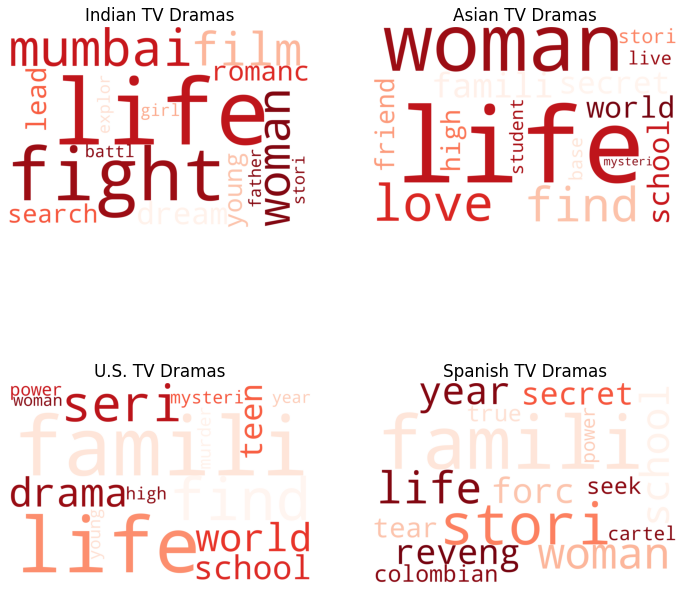

In [ ]:
def get_wordcloud_from_df(df):
    text = []
    for i in range(len(df)):

        word = df.index[i].split('dtm_descr_')[1]

        for j in range(df.iloc[i]):
            text = text + [word]

    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', 
                      colormap='Reds', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(', '.join(text))
    
    return wordcloud

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

temp = netflix_shows[(netflix_shows.listed_in_TVDramas == 1) & (netflix_shows.country_India == 1)][netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15)
wordcloud = get_wordcloud_from_df(temp)
ax[0,0].imshow(wordcloud) 
ax[0,0].axis("off");
ax[0,0].set_title('Indian TV Dramas')

temp = netflix_shows[(netflix_shows.listed_in_TVDramas == 1) & ((netflix_shows.country_Japan == 1)  | (netflix_shows.country_SouthKorea == 1)| (netflix_shows.country_China == 1)| (netflix_shows.country_Taiwan == 1))][netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15)
wordcloud = get_wordcloud_from_df(temp)
ax[0,1].imshow(wordcloud) 
ax[0,1].axis("off");
ax[0,1].set_title('Asian TV Dramas')

temp = netflix_shows[(netflix_shows.listed_in_TVDramas == 1) & (netflix_shows.country_UnitedStates == 1)][netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15)
wordcloud = get_wordcloud_from_df(temp)
ax[1,0].imshow(wordcloud) 
ax[1,0].axis("off");
ax[1,0].set_title('U.S. TV Dramas')

temp = netflix_shows[(netflix_shows.listed_in_TVDramas == 1) & ((netflix_shows.country_Spain == 1)  | (netflix_shows.country_Colombia == 1)| (netflix_shows.country_Mexico == 1))][netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15)
wordcloud = get_wordcloud_from_df(temp)
ax[1,1].imshow(wordcloud) 
ax[1,1].axis("off");
ax[1,1].set_title('Spanish TV Dramas')

plt.show()

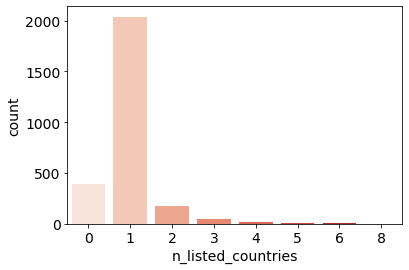

,title,n_listed_countries
517,Shaun the Sheep,8
2604,The Making of Frozen Planet,6
2267,Frozen Planet,6
1688,Ultimate Beastmaster,6
2527,Shaka Zulu,5
2328,Iron Man: Armored Adventures,5
373,My Love: Six Stories of True Love,5
1757,Black Crows,5
563,Octonauts,4
1768,Troy,4


In [ ]:
netflix_shows['n_listed_countries'] = netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('country')]].sum(axis=1)
sns.countplot(netflix_shows['n_listed_countries'], palette='Reds');
plt.show()

netflix_shows[['title', 'n_listed_countries']].sort_values(by = 'n_listed_countries', ascending=False).head(15).style.set_caption('TV Shows listed in most countries')

In [ ]:
# Save current state to output
netflix_shows.to_csv("netflix_shows.csv", index=False)